In [24]:
import os
print(os.getcwd())

import xarray as xr

file_path = "../data/climate-monthly/netcdf/PM25/GWRwSPEC_PM25_NA_200001_200001-RH35.nc"

ds = xr.open_dataset(file_path)
print(ds.values)

/net/rcstorenfs02/ifs/rc_labs/dominici_lab/lab/projects/pm-mortality-generative/ahmet/pm-mortality-generative/notebooks
<bound method Mapping.values of <xarray.Dataset> Size: 169MB
Dimensions:  (LON: 9300, LAT: 4550)
Coordinates:
  * LON      (LON) float64 74kB -138.0 -138.0 -138.0 ... -45.03 -45.01 -45.01
  * LAT      (LAT) float64 36kB 68.0 67.99 67.97 67.96 ... 22.52 22.51 22.5
Data variables:
    PM25     (LAT, LON) float32 169MB ...>


In [18]:
import rasterio
ds = xr.open_dataset("../data/climate-monthly/netcdf/PM25/GWRwSPEC_PM25_NA_200001_200001-RH35.nc")
layer = getattr(ds, "PM25")

# obtain affine transform/boundaries
dims = layer.dims
assert len(dims) == 2, "netcdf coordinates must be 2d"
lon = layer["LON"].values
lat = layer["LAT"].values
#transform = rasterio.transform.from_origin(
#//    lon[0], lat[-1], lon[1] - lon[0], lat[1] - lat[0]
#)
#transform

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom  # For resizing images

# Load the dataset
ds = xr.open_dataset("../data/climate-monthly/netcdf/PM25/GWRwSPEC_PM25_NA_200001_200001-RH35.nc")
layer = ds["PM25"]  # The PM2.5 variable

# Extract the relevant variables
lon = layer["LON"].values
lat = layer["LAT"].values

# Ensure the data is 2D (check it has the correct dimensions)
assert len(layer.dims) == 2, "The data must be 2D"

# Function to resize the 2D data to 128x256 using scipy.ndimage.zoom
def resize_layer_zoom(data, new_shape=(128, 256)):
    # Calculate the zoom factors for each axis (height, width)
    zoom_factors = [new_shape[0] / data.shape[0], new_shape[1] / data.shape[1]]
    return zoom(data, zoom_factors, order=3)  # 'order=3' for cubic interpolation

# Resize the 2D data to 128x256
resized_data = resize_layer_zoom(layer.values)  # Resize the entire 2D array

# Save the resized data as an image
def save_as_image(data, filename="resized_image.png"):
    plt.imshow(data, cmap="viridis", origin="lower")  # Choose a colormap
    plt.colorbar(label="PM2.5")  # Add a colorbar
    plt.title("Resized PM2.5 Data")  # Add a title
    plt.savefig(filename, dpi=300)
    plt.close()

# Save the resized image
save_as_image(resized_data, "resized_pm25_image.png")

print("Resized image saved successfully!")


Resized image saved successfully!


In [17]:
# import packages 
import xarray as xr 
import rioxarray as rio 

nc_file = xr.open_dataset("../data/climate-monthly/netcdf/PM25/GWRwSPEC_PM25_NA_200001_200001-RH35.nc")
bT = nc_file['PM25']
bT = bT.rio.set_spatial_dims(x_dim='LON', y_dim='LAT')
bT.rio.write_crs("epsg:4326", inplace=True)
bT.rio.to_raster(r"medsea_bottomT_raster.tif")



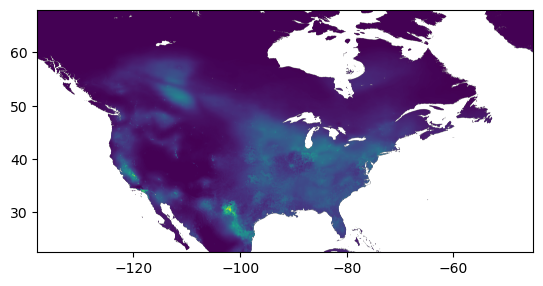

<Axes: >

In [16]:
import rasterio
from rasterio.plot import show
fp = r'medsea_bottomT_raster.tif'
img = rasterio.open(fp)
show(img)